# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 2
### Interpolacja
#### Mateusz Surjak

## Zadanie 1 Wielomiany interpolujące

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import time

Dla funkcji $f(x) = \frac{1}{1+ x^{2}}$ i n = 5,10,15 wyliczę wielomian interpolacyjny

In [3]:
def fx(x):
    return 1 / (1 + x ** 2)

W metodzie tej zastosuję interpolację w równoodległych od siebie punktach, pozwoli to zaobserwować **efekt Rungego** na wykresie funckji zinterpolowanej.
* **Efekt Rungego** - pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

Do zinterpolowania funkcji wykorzystam interpolację wielomianową z macierzą Vandermonda.






<center> $\begin{bmatrix} x^{0}_{0} & x^{1}_{0}& ... & x^{n}_{0} \\x^{0}_{1} & x^{1}_{1} & ...& x^{n}_{1} \\ ... & ... &... & ... \\x^{0}_{n} & x^{1}_{n} & ...& x^{n}_{n}\end{bmatrix}$ 
$\begin{bmatrix}  a_{0} \\ a_{1} \\ ...\\ a_{n} \end{bmatrix}$
= $\begin{bmatrix}  f(x_{0}) \\ f(x_{1}) \\ ...\\ f(x_{n}) \end{bmatrix}$</center>

In [4]:
def px(n):
    xs = np.linspace(-5, 5, n + 1)
    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)
    plty = []
    err = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, plty)
    real = []
    for xii in pltx:
        real.append(fx(xii))
    plt.plot(pltx, real)
    plt.plot(pltx, err)
    plt.show()

#### Sprawdźmy więc wykresy funkcji dla n podanych w treści zadania

* <span style="color: orange">pomarańczowy</span> - oryginalna funkcja
* <span style="color: blue">niebieski</span> - funkcja zinterpolowana
* <span style="color: green">zielony</span> - błąd interpolacji

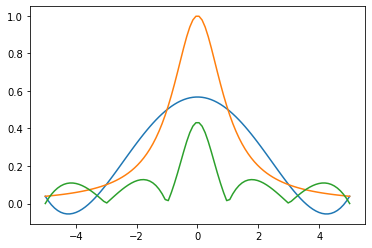

In [5]:
px(5)

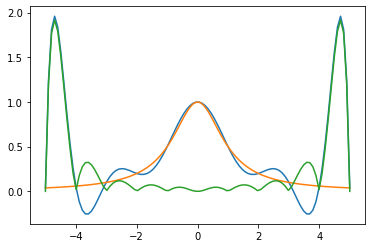

In [6]:
px(10)

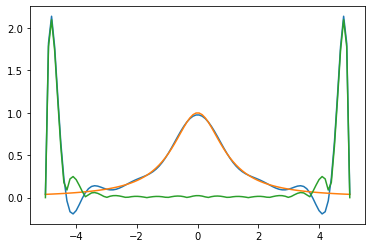

In [7]:
px(15)

Jak widać funckcja na końcach przedziału bardzo się rozjeżdża. To zjawisko zwane jest efektem Rungego.
Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

In [8]:
def interpolation_error(n):
    err = []
    xs = np.linspace(-5, 5, n + 1)
    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)

    plty = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, err)
    plt.show()

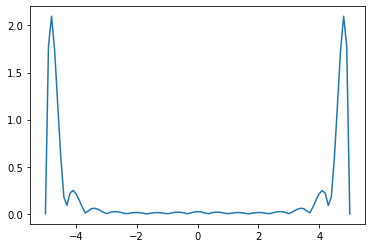

In [9]:
interpolation_error(15)

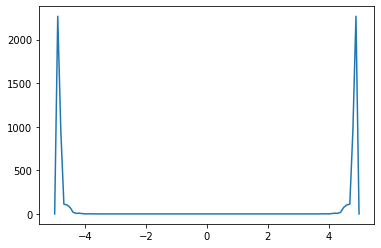

In [10]:
interpolation_error(30)

Ostatnie dwa wykresay obrazują reszty interpolacji.
Można zauważyć iż wraz ze wzrostem liczby punktów błąd na koncach przedziały rośnie.

## Zadanie 2 Wielomiany interpolujące

Jak wspomniałem wyżej, aby uninąć efektu Rungego należy interpolować wielomian w **węzłach Czebyszewa**.
Kolejne wązły **Czebyszewa** są dane wzorem: 
$$ x_{k} = \frac{1}{2}(a+b) + \frac{1}{2}(b-a)cos(\frac{2k-1}{2n}\pi) $$

Wtedy kolejne węzły Czebyszewa ukłądają się jakby na okręgu przez co na końcach przedziałów występuje zagęszczenie punktów.
<br>
Metoda interpolacji jest analogiczna do tej z poprzedniego zadania, jedynie zmieniają się punkty interpolacji.

In [11]:
def czebyszew(n, a, b):
    xs = []
    for i in range(1, n + 1):
        x = (1 / 2) * (a + b) + (1 / 2) * (b - a) * np.cos(((2 * i - 1) / (2 * n)) * np.pi)
        xs.append(x)

    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)
    plty = []
    err = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, plty)
    real = []
    for xii in pltx:
        real.append(fx(xii))
    plt.plot(pltx, real)
    plt.plot(pltx, err)
    plt.show()

* <span style="color: orange">pomarańczowy</span> - oryginalna funkcja
* <span style="color: blue">niebieski</span> - funkcja zinterpolowana
* <span style="color: green">zielony</span> - błąd interpolacji

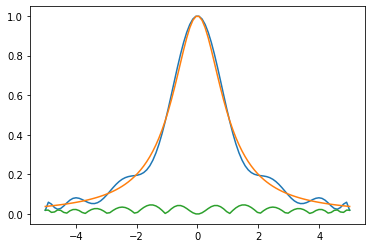

In [12]:
czebyszew(15, -5, 5)

Błąd interpolacji na końcach przedziału drastycznie zmalał dzięki zastosowaniu interpolakcji w węzłach Czebyszewa, stało się tak ponieważ wtedy występuje zagęszczenie punktów na końcach przedziału. Zjawiskiem negatywnym jest natomiast to, iż w centralnych cześciach funcji błąd interpolacji się troszkę zwiększył gdyż znowu tutaj mieliśmy mniej punktów niż w poprzednim zadaniu, gdyż wiekszość punktów interpolacji "pobrały" końce przedziału.

## Zadanie 3 Interpolacja krzywych funkcjami sklejanymi

Mamy daną elipsę w postaci parametrycznej
$$
\begin{align}
\begin{cases}
x = a \cdot cos(t)\\
y = b \cdot sin(t)\\
\end{cases}
\end{align}
$$
gdzie t ∈ [0, 2π]



**Interpolacja** przy pomocy funkcji sklejanych,
polega na tym, że wielomian interpolujący jest tworzony oddzielnie dla każdego odcinka
pomiędzy dwoma kolejnymi węzłami. Współczynniki wielomianów obowiązujących 
na poszczególnych odcinkach są wyznaczane tak, aby we węzłach zapewnić ciągłość nie 
tylko funkcji interpolującej ale także jej pochodnych do stopnia 1−n włącznie, 
jeżeli stopień wielomianu interpolującego jest równy n .



###### Definiuje funkcje odpowiadające naszej elipsie:

In [2]:
from scipy import interpolate

a = -5
b = 5

def xx(t):
    return a * np.cos(t)


def yy(t):
    return b * np.sin(t)

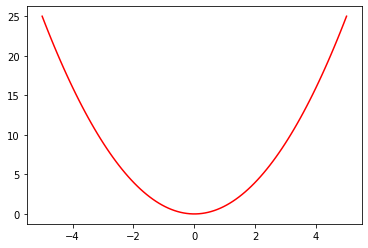

In [53]:
xp = interpolate.interp1d(np.linspace(-5,5,100), list(map(xx,np.linspace(-5,5,100))), kind='cubic')
z = []
f = []
for i in np.linspace(-5,5,100):
    z.append(xp(i))
    f.append(i)
# plt.plot(f,xx)
# plt.show()


Interpolacje wykonuję z użyciem funkcji **interpolate.interp1d** dostępnej w bibliotece **scipy**
* kind = 'cubic' oznacza interpolację funkcjami sześciennymi

Interpolację wykonuję osobno dla zbioru punktów x i y

In [46]:
def interpolate_elipse(p):
    t = np.linspace(0, 2 * np.pi, p)
    sp = interpolate.interp1d(t, list(map(xx, t)), kind='cubic')
    sp2 = interpolate.interp1d(t, list(map(yy, t)), kind='cubic')
    t_super = np.linspace(0, 2 * np.pi, 100)
    x = []
    y = []
    for t in t_super:
        x.append(sp(t))
        y.append(sp2(t))
    plt.plot(x,y)
    plt.show()



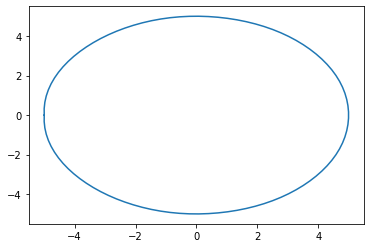

In [45]:
interpolate_elipse(10)

Jak można zauważyć nasza interpolacja funckajmi sklejanymi dla 10-ciu punktów daje bardzo dobry wynik.

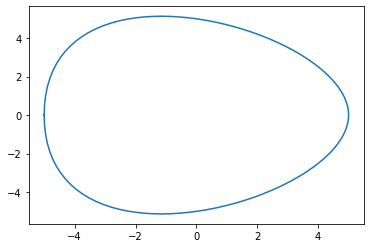

In [20]:
interpolate_elipse(5)

Dla 5-ciu punktów jest już pewna rozbieżność pomiędzy realnym wyglądem elipsy.

## Wnioski
* Metoda interpolacji jest bardzo przydatna ale należy dobrze przemyśleć sposób jej użycia aby uniknąć pewnych wad jak wspominany **efekt Rungego**.
* Interpolowanie w węzłach Czebyszewa rozwiązuje ten problem bardzo dobrze.
* Metoda interpolacji sześciennymi funkcjami sklejanymi daje bardzo dobre wyniki, nie zauważyłem żadnych niepożądanych efektów działania ten metody.